In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fake-news/train.csv')

In [3]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


# Perform Text Preprocessing

In [4]:
df = df.dropna()

In [5]:
messages = df.copy()

In [6]:
messages.reset_index(inplace = True)

In [7]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [21]:
ps = PorterStemmer()

In [22]:
corpus = []

In [23]:
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Apply TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfidf = TfidfVectorizer(max_features = 5000, ngram_range = (1,3))

In [28]:
x = tfidf.fit_transform(corpus).toarray()

In [29]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
x.shape

(18285, 5000)

In [31]:
y = messages['label']

In [32]:
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

# Divide the Dataset into train and test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state = 0)

# Confusion Matrix

In [36]:
import matplotlib.pyplot as plt

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Apply ML algorithm

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
classifier = MultinomialNB()

In [40]:
from sklearn import metrics
import numpy as np
import itertools

In [41]:
classifier.fit(x_train,y_train)

MultinomialNB()

In [42]:
prediction = classifier.predict(x_test)

In [44]:
score = metrics.accuracy_score(y_test,prediction)

In [49]:
score

0.8801988400994201

In [45]:
cm = metrics.confusion_matrix(y_test,prediction)

In [48]:
cm

array([[3190,  199],
       [ 524, 2122]])

Confusion matrix, without normalization


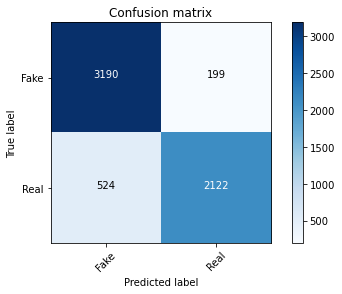

In [47]:
plot_confusion_matrix(cm,classes=['Fake','Real'])

In [51]:
feature_names = tfidf.get_feature_names()

In [52]:
sorted(zip(classifier.coef_[0],feature_names),reverse = True)[:20]   # less fake words: remove reverse = true to get most fake words

[(-4.978698929112481, 'hillari'),
 (-5.017999219996832, 'trump'),
 (-5.120189923823157, 'clinton'),
 (-5.447514218951271, 'elect'),
 (-5.746914581822371, 'video'),
 (-5.805603603012202, 'comment'),
 (-5.823087204502955, 'war'),
 (-5.842019879412967, 'us'),
 (-5.909080377707294, 'hillari clinton'),
 (-5.9115095276982, 'fbi'),
 (-5.958902292117523, 'vote'),
 (-5.980397447289468, 'world'),
 (-6.063124198426893, 'email'),
 (-6.155699003081237, 'obama'),
 (-6.1647591547918745, 'america'),
 (-6.192229560571004, 'russia'),
 (-6.2556512763196, 'american'),
 (-6.256253147110103, 'day'),
 (-6.313539913520354, 'break'),
 (-6.331790021060142, 'presid')]